# Melakukan Prediksi dengan menggunakan model LSTM

## Library yang digunakan

In [1]:
# Numpy untuk formatting number atau array
import numpy as np

# Pandas untuk membuat DataFrame dan membaca dokumen csv
import pandas as pd 

import matplotlib.pyplot as mtlplt
from matplotlib import rcParams

# Tensorflow dan Keras sebagai Framework dan Backend
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras import optimizers

# Sklearn sebagai komponen machine learning, untuk normalisasi, membagi dataset dan menghitung nilai error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Logging untuk mencatat tiap aktivitas yang dilakukan sistem
import logging

# OS untuk operation system, sys untuk system, time untuk waktu, tqdm notebook untuk notebook jika dibuat selain google colab
import os
import sys
import time
import math
import datetime
from datetime import date, timedelta

Using TensorFlow backend.


In [2]:
today_date = date.today().strftime('%Y-%m-%d')
print('SCRIPT RUN ON ' + today_date)

SCRIPT RUN ON 2022-04-25


In [3]:
# Membuka dataset hasil unduhan
data = pd.read_csv('inputs/BBCA.JK.csv')

data

Date    Open    High     Low   Close    Adj Close     Volume
0     2011-01-03  1290.0  1330.0  1290.0  1290.0  1113.228027   30687500
1     2011-01-04  1300.0  1330.0  1300.0  1300.0  1121.857788   60622500
2     2011-01-05  1320.0  1330.0  1290.0  1320.0  1139.116943   93312500
3     2011-01-06  1310.0  1330.0  1290.0  1310.0  1130.487427   56425000
4     2011-01-07  1280.0  1300.0  1260.0  1280.0  1104.598145  108225000
...          ...     ...     ...     ...     ...          ...        ...
2729  2021-12-24  7300.0  7350.0  7300.0  7300.0  7300.000000   30802100
2730  2021-12-27  7300.0  7350.0  7300.0  7350.0  7350.000000   20722100
2731  2021-12-28  7375.0  7400.0  7325.0  7350.0  7350.000000   39343800
2732  2021-12-29  7350.0  7375.0  7300.0  7300.0  7300.000000   42079500
2733  2021-12-30  7350.0  7350.0  7300.0  7300.0  7300.000000   49954700

[2734 rows x 7 columns]

In [4]:
data.describe()

Open         High          Low        Close    Adj Close  \
count  2734.000000  2734.000000  2734.000000  2734.000000  2734.000000   
mean   3640.263350  3674.001463  3603.108998  3638.701536  3438.863541   
std    1839.302624  1853.443214  1820.744589  1836.245552  1859.480993   
min    1080.000000  1100.000000  1060.000000  1080.000000   932.004822   
25%    2080.000000  2106.250000  2060.000000  2080.000000  1865.766724   
50%    2935.000000  2965.000000  2912.500000  2940.000000  2717.701050   
75%    5450.000000  5500.000000  5397.500000  5460.000000  5214.333008   
max    7800.000000  8250.000000  7600.000000  7750.000000  7724.080078   

             Volume  
count  2.734000e+03  
mean   7.407468e+07  
std    5.011255e+07  
min    0.000000e+00  
25%    4.601750e+07  
50%    6.529500e+07  
75%    8.983638e+07  
max    1.062862e+09

In [5]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
# Membaca Dataset
df = pd.DataFrame(data)
df = df.dropna()
df = df.reset_index(drop=True)
print(df.shape)
print(df.columns)
display(df.head(5))

# Menampilkan Feature dan Tipe Data yang digunakan
print("\n Tipe data pada Fitur yang digunakan :")
print(df.info())

(2734, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


Date    Open    High     Low   Close    Adj Close     Volume
0  2011-01-03  1290.0  1330.0  1290.0  1290.0  1113.228027   30687500
1  2011-01-04  1300.0  1330.0  1300.0  1300.0  1121.857788   60622500
2  2011-01-05  1320.0  1330.0  1290.0  1320.0  1139.116943   93312500
3  2011-01-06  1310.0  1330.0  1290.0  1310.0  1130.487427   56425000
4  2011-01-07  1280.0  1300.0  1260.0  1280.0  1104.598145  108225000


 Tipe data pada Fitur yang digunakan :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2734 entries, 0 to 2733
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2734 non-null   object 
 1   Open       2734 non-null   float64
 2   High       2734 non-null   float64
 3   Low        2734 non-null   float64
 4   Close      2734 non-null   float64
 5   Adj Close  2734 non-null   float64
 6   Volume     2734 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 149.6+ KB
None


In [7]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

##  Visualisasi terhadap dataset

In [8]:
import plotly.graph_objects as go
import pandas as pd
from datetime import datetime

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])
fig.show()

In [9]:
#create newdata
scaling_data = df.filter(['Open','High','Low','Close','Adj Close','Volume'])

#scaling
scaler = MinMaxScaler(feature_range=(0,1))
scaled_Data = scaler.fit_transform(scaling_data)

#membentuk ke dataframe
scaled_data = pd.DataFrame(data=scaled_Data, index=[df.Date], columns=['Open','High','Low','Close','Adj Close','Volume'] )

In [10]:
scaled_data

Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2011-01-03  0.031250  0.032168  0.035168  0.031484   0.026682  0.028873
2011-01-04  0.032738  0.032168  0.036697  0.032984   0.027952  0.057037
2011-01-05  0.035714  0.032168  0.035168  0.035982   0.030493  0.087794
2011-01-06  0.034226  0.032168  0.035168  0.034483   0.029223  0.053088
2011-01-07  0.029762  0.027972  0.030581  0.029985   0.025411  0.101824
...              ...       ...       ...       ...        ...       ...
2021-12-24  0.925595  0.874126  0.954128  0.932534   0.937563  0.028980
2021-12-27  0.925595  0.874126  0.954128  0.940030   0.944924  0.019497
2021-12-28  0.936756  0.881119  0.957951  0.940030   0.944924  0.037017
2021-12-29  0.933036  0.877622  0.954128  0.932534   0.937563  0.039591
2021-12-30  0.933036  0.874126  0.954128  0.932534   0.937563  0.047000

[2734 rows x 6 columns]

In [11]:
stock_close_data_date = df.filter(['Date'])

In [12]:
#membuat data untuk menampung data close
stock_close_data = df.filter(['Close'])

#merubah ke array numpy
stock_close_dataset = stock_close_data.values

#split data sebanyak 80% untuk train
trainingDataLength = int(np.ceil( len(stock_close_dataset) * 0.8 ))
trainingDataLength

2188

In [13]:
#data test 20%
testingData = len(df)-trainingDataLength
testingData

546

In [14]:
#scaling
scaler = MinMaxScaler(feature_range=(0,1))

#transform
scaledData = scaler.fit_transform(stock_close_dataset)
scaledData
#scaledData.shape

array([[0.03148426],
       [0.03298351],
       [0.03598201],
       ...,
       [0.94002999],
       [0.93253373],
       [0.93253373]])

In [15]:
#membuat data train yg telah discale
StockTrainData = scaledData[0:int(trainingDataLength) , :]

#split menjadi data Xtrain dan Ytrain
Xtrain = []
Ytrain = []

for i in range(60, len(StockTrainData)):
    Xtrain.append(StockTrainData[i-60:i, 0])
    Ytrain.append(StockTrainData[i, 0])
    if i<= 61:
        print(Xtrain)
        print(Ytrain)
        print()
        
#Konversi Xtrain dan Ytrain ke numpy arrays
Xtrain, Ytrain = np.array(Xtrain), np.array(Ytrain)

#Reshape data
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1],1))
Xtrain.shape

[array([0.03148426, 0.03298351, 0.03598201, 0.03448276, 0.02998501,
       0.0149925 , 0.0089955 , 0.011994  , 0.0149925 , 0.01949025,
       0.01649175, 0.011994  , 0.01049475, 0.0089955 , 0.00149925,
       0.        , 0.005997  , 0.01349325, 0.0149925 , 0.011994  ,
       0.00749625, 0.00749625, 0.01349325, 0.017991  , 0.01949025,
       0.017991  , 0.0149925 , 0.0089955 , 0.01649175, 0.02098951,
       0.01949025, 0.017991  , 0.02248876, 0.02548726, 0.02548726,
       0.02998501, 0.02548726, 0.02098951, 0.02698651, 0.03148426,
       0.03298351, 0.03748126, 0.04197901, 0.04497751, 0.04347826,
       0.04347826, 0.04497751, 0.04197901, 0.04197901, 0.03748126,
       0.03898051, 0.03448276, 0.03448276, 0.03898051, 0.04047976,
       0.04197901, 0.04347826, 0.04497751, 0.04647676, 0.04647676])]
[0.043478260869565216]

[array([0.03148426, 0.03298351, 0.03598201, 0.03448276, 0.02998501,
       0.0149925 , 0.0089955 , 0.011994  , 0.0149925 , 0.01949025,
       0.01649175, 0.011994  , 0.0

(2128, 60, 1)

In [16]:
params = {
    'n_nodes': 256, # 100, 256
    'dropout_rate': 0.2,
    'optimizer': 'Adam', # Adam, RMSprop
    'epochs': 200, # 20, 100, 250, 500, 1000
    'batch_size': 50, # 1, 2, 4, 64, 100, 150
}

In [17]:
## Build the LSTM model
model = Sequential()

#layer pertama LSTM
model.add(LSTM(units=params['n_nodes'], return_sequences=True, input_shape= (Xtrain.shape[1], 1))) 
model.add(Dropout(params['dropout_rate']))

#layer kedua LSTM
model.add(LSTM(units=params['n_nodes'], return_sequences=False))
model.add(Dropout(params['dropout_rate']))

## Output layer
model.add(Dense(25))
model.add(Dense(1))

In [18]:
#compile model
model.compile(optimizer=params['optimizer'], loss='mean_squared_error', metrics=['mean_absolute_error'])

In [19]:
## Print the architecture of the model
print('== Model Summary ==')
print(model.summary())

== Model Summary ==
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 256)           264192    
_________________________________________________________________
dropout (Dropout)            (None, 60, 256)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 25)                6425      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 795,955
Trainable params: 795,955
Non-trainable params: 0
______________________________

In [20]:
import time
start_time = time.time()
#fitting model data train
history_data = model.fit(Xtrain, Ytrain, epochs=params['epochs'], 
                         batch_size=params['batch_size'],
                         verbose=1, validation_split=.2)



print('Training time: ' + str(time.time() - start_time) + ' seconds')

print("Menyimpan model . . .")
model.save("outputs/modelLSTM_BBCA.h5")

Epoch 1/200
35/35 [==============================] - 8s 243ms/step - loss: 0.0055 - mean_absolute_error: 0.0478 - val_loss: 0.0026 - val_mean_absolute_error: 0.0484
Epoch 2/200
35/35 [==============================] - 8s 227ms/step - loss: 2.7651e-04 - mean_absolute_error: 0.0123 - val_loss: 2.9394e-04 - val_mean_absolute_error: 0.0137
Epoch 3/200
35/35 [==============================] - 10s 298ms/step - loss: 2.0336e-04 - mean_absolute_error: 0.0102 - val_loss: 2.5221e-04 - val_mean_absolute_error: 0.0123
Epoch 4/200
35/35 [==============================] - 10s 296ms/step - loss: 1.8370e-04 - mean_absolute_error: 0.0100 - val_loss: 2.1792e-04 - val_mean_absolute_error: 0.0111
Epoch 5/200
35/35 [==============================] - 11s 304ms/step - loss: 1.7498e-04 - mean_absolute_error: 0.0096 - val_loss: 9.2925e-04 - val_mean_absolute_error: 0.0272
Epoch 6/200
35/35 [==============================] - 10s 284ms/step - loss: 2.4699e-04 - mean_absolute_error: 0.0119 - val_loss: 0.0014 - va

Epoch 48/200
35/35 [==============================] - 10s 295ms/step - loss: 1.0315e-04 - mean_absolute_error: 0.0075 - val_loss: 2.2561e-04 - val_mean_absolute_error: 0.0121
Epoch 49/200
35/35 [==============================] - 10s 296ms/step - loss: 9.2279e-05 - mean_absolute_error: 0.0072 - val_loss: 7.8151e-04 - val_mean_absolute_error: 0.0254
Epoch 50/200
35/35 [==============================] - 10s 298ms/step - loss: 1.0022e-04 - mean_absolute_error: 0.0075 - val_loss: 6.2121e-04 - val_mean_absolute_error: 0.0225
Epoch 51/200
35/35 [==============================] - 10s 299ms/step - loss: 1.2825e-04 - mean_absolute_error: 0.0084 - val_loss: 1.6318e-04 - val_mean_absolute_error: 0.0099
Epoch 52/200
35/35 [==============================] - 10s 300ms/step - loss: 1.0062e-04 - mean_absolute_error: 0.0074 - val_loss: 1.4591e-04 - val_mean_absolute_error: 0.0089
Epoch 53/200
35/35 [==============================] - 11s 304ms/step - loss: 8.9551e-05 - mean_absolute_error: 0.0070 - val_l

Epoch 95/200
35/35 [==============================] - 11s 322ms/step - loss: 9.1420e-05 - mean_absolute_error: 0.0073 - val_loss: 0.0011 - val_mean_absolute_error: 0.0314
Epoch 96/200
35/35 [==============================] - 11s 309ms/step - loss: 1.2246e-04 - mean_absolute_error: 0.0084 - val_loss: 3.5227e-04 - val_mean_absolute_error: 0.0162
Epoch 97/200
35/35 [==============================] - 12s 331ms/step - loss: 1.4158e-04 - mean_absolute_error: 0.0090 - val_loss: 5.7910e-04 - val_mean_absolute_error: 0.0218
Epoch 98/200
35/35 [==============================] - 11s 325ms/step - loss: 9.6217e-05 - mean_absolute_error: 0.0075 - val_loss: 1.2025e-04 - val_mean_absolute_error: 0.0083
Epoch 99/200
35/35 [==============================] - 11s 306ms/step - loss: 8.8369e-05 - mean_absolute_error: 0.0070 - val_loss: 4.7659e-04 - val_mean_absolute_error: 0.0196
Epoch 100/200
35/35 [==============================] - 11s 319ms/step - loss: 1.3574e-04 - mean_absolute_error: 0.0089 - val_loss

35/35 [==============================] - 12s 332ms/step - loss: 1.1410e-04 - mean_absolute_error: 0.0079 - val_loss: 4.6815e-04 - val_mean_absolute_error: 0.0194
Epoch 142/200
35/35 [==============================] - 11s 302ms/step - loss: 8.9859e-05 - mean_absolute_error: 0.0071 - val_loss: 1.4087e-04 - val_mean_absolute_error: 0.0095
Epoch 143/200
35/35 [==============================] - 10s 297ms/step - loss: 7.6071e-05 - mean_absolute_error: 0.0064 - val_loss: 1.8470e-04 - val_mean_absolute_error: 0.0115
Epoch 144/200
35/35 [==============================] - 11s 318ms/step - loss: 7.8141e-05 - mean_absolute_error: 0.0066 - val_loss: 1.4893e-04 - val_mean_absolute_error: 0.0099
Epoch 145/200
35/35 [==============================] - 11s 319ms/step - loss: 6.6671e-05 - mean_absolute_error: 0.0062 - val_loss: 1.0355e-04 - val_mean_absolute_error: 0.0079
Epoch 146/200
35/35 [==============================] - 11s 310ms/step - loss: 6.8817e-05 - mean_absolute_error: 0.0062 - val_loss: 1.1

Epoch 188/200
35/35 [==============================] - 11s 323ms/step - loss: 7.6017e-05 - mean_absolute_error: 0.0066 - val_loss: 9.1979e-05 - val_mean_absolute_error: 0.0073
Epoch 189/200
35/35 [==============================] - 12s 345ms/step - loss: 8.3469e-05 - mean_absolute_error: 0.0069 - val_loss: 1.3671e-04 - val_mean_absolute_error: 0.0095
Epoch 190/200
35/35 [==============================] - 13s 373ms/step - loss: 7.5759e-05 - mean_absolute_error: 0.0064 - val_loss: 0.0012 - val_mean_absolute_error: 0.0334
Epoch 191/200
35/35 [==============================] - 12s 353ms/step - loss: 1.1430e-04 - mean_absolute_error: 0.0080 - val_loss: 9.1843e-05 - val_mean_absolute_error: 0.0072
Epoch 192/200
35/35 [==============================] - 12s 338ms/step - loss: 8.5255e-05 - mean_absolute_error: 0.0069 - val_loss: 1.4457e-04 - val_mean_absolute_error: 0.0098
Epoch 193/200
35/35 [==============================] - 12s 329ms/step - loss: 1.1553e-04 - mean_absolute_error: 0.0081 - val

In [21]:
from matplotlib import pyplot as plt

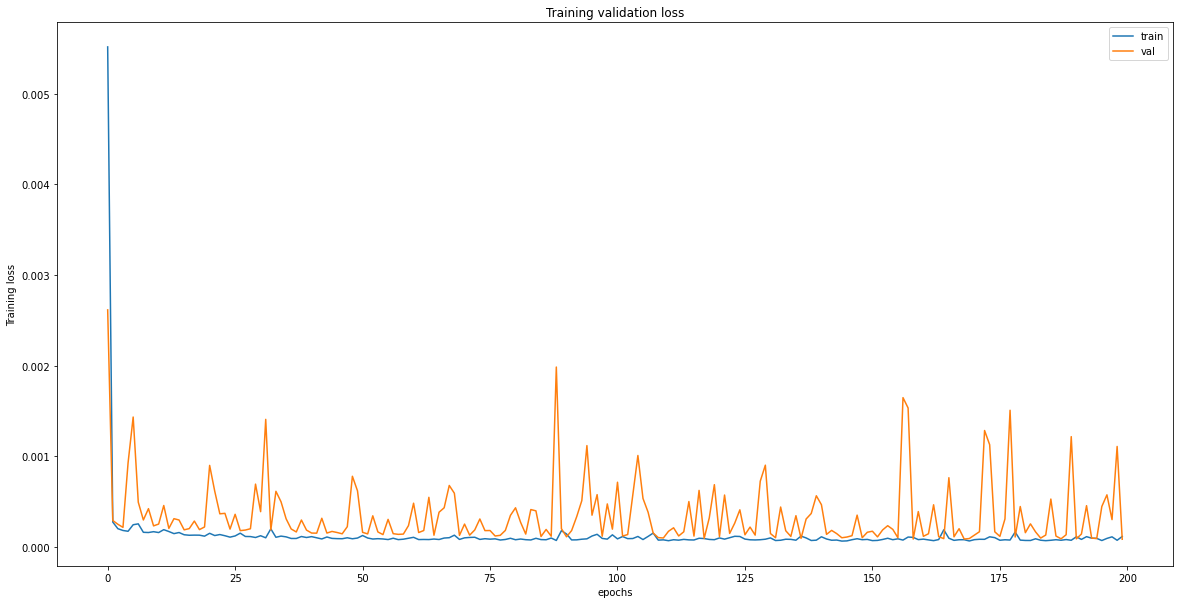

In [22]:
#perbandingan antara train loss dan val loss RMSE
plt.figure(figsize=(20,10))
plt.title('Training validation loss')
plt.plot(history_data.history['loss'])
plt.plot(history_data.history['val_loss'])
plt.ylabel('Training loss')
plt.xlabel('epochs')
plt.legend(['train' , 'val'], loc = 'upper right')
plt.savefig('outputs/Assets/Final/perbandingan antara train loss dan val loss.png', dpi=200)
#mtlplt.show()

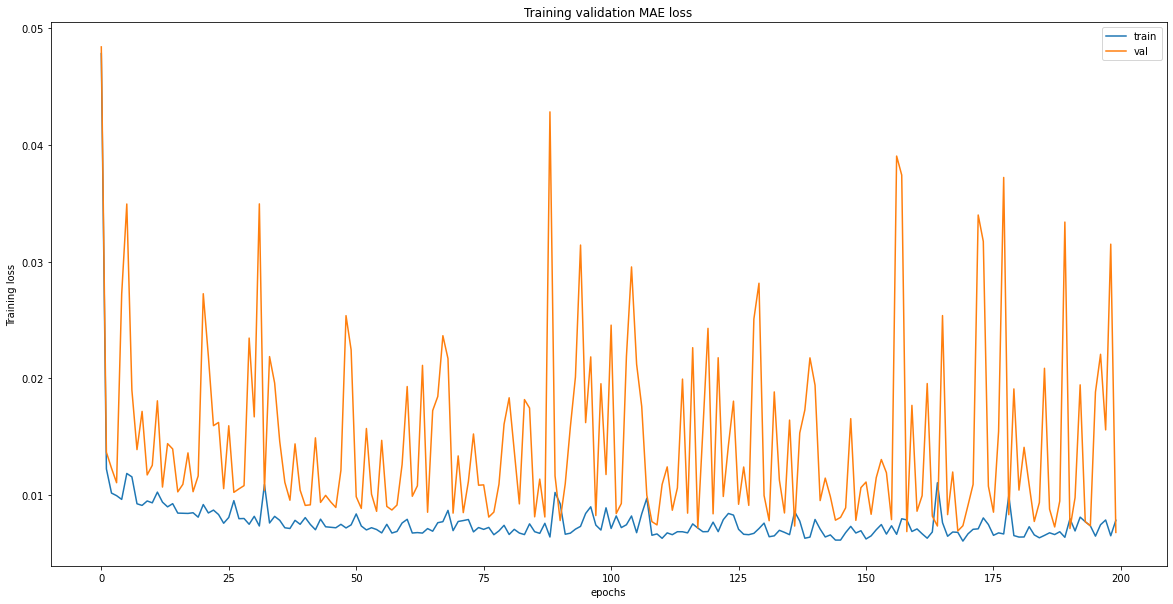

In [23]:
#perbandingan antara train loss dan val loss MAE
plt.figure(figsize=(20,10))
plt.title('Training validation MAE loss')
plt.plot(history_data.history['mean_absolute_error'])
plt.plot(history_data.history['val_mean_absolute_error'])
plt.ylabel('Training loss')
plt.xlabel('epochs')
plt.legend(['train' , 'val'], loc = 'upper right')
plt.savefig('outputs/Assets/Final/perbandingan antara train loss dan val loss MAE.png', dpi=200)
#mtlplt.show()

# MAKE PREDICTION

In [24]:
#membuat var data testing
testingData = scaledData[int(trainingDataLength) - 60: , :]

#membuat Xtest dan Ytest
Xtest = []
Ytest = stock_close_dataset[trainingDataLength:, :]
for i in range(60, len(testingData)):
    Xtest.append(testingData[i-60:i, 0])

In [25]:
#np array
Xtest = np.array(Xtest)
Xtest

array([[0.76011994, 0.75937031, 0.76761619, ..., 0.74437781, 0.74812594,
        0.75262369],
       [0.75937031, 0.76761619, 0.78110945, ..., 0.74812594, 0.75262369,
        0.74812594],
       [0.76761619, 0.78110945, 0.77286357, ..., 0.75262369, 0.74812594,
        0.75412294],
       ...,
       [0.88155922, 0.87931034, 0.91454273, ..., 0.93253373, 0.93253373,
        0.94002999],
       [0.87931034, 0.91454273, 0.91154423, ..., 0.93253373, 0.94002999,
        0.94002999],
       [0.91454273, 0.91154423, 0.93103448, ..., 0.94002999, 0.94002999,
        0.93253373]])

In [26]:
# reshape data from 2 dimensi ke 3 dimensi
Xtest = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], 1 ))
Xtest

array([[[0.76011994],
        [0.75937031],
        [0.76761619],
        ...,
        [0.74437781],
        [0.74812594],
        [0.75262369]],

       [[0.75937031],
        [0.76761619],
        [0.78110945],
        ...,
        [0.74812594],
        [0.75262369],
        [0.74812594]],

       [[0.76761619],
        [0.78110945],
        [0.77286357],
        ...,
        [0.75262369],
        [0.74812594],
        [0.75412294]],

       ...,

       [[0.88155922],
        [0.87931034],
        [0.91454273],
        ...,
        [0.93253373],
        [0.93253373],
        [0.94002999]],

       [[0.87931034],
        [0.91454273],
        [0.91154423],
        ...,
        [0.93253373],
        [0.94002999],
        [0.94002999]],

       [[0.91454273],
        [0.91154423],
        [0.93103448],
        ...,
        [0.94002999],
        [0.94002999],
        [0.93253373]]])

In [27]:
#Model prediksi dari array Xtest
prediksi = model.predict(Xtest)
#merubah kedata asal 
prediksi = scaler.inverse_transform(prediksi)

In [28]:
prediksi

array([[6083.382 ],
       [6070.953 ],
       [6094.929 ],
       [6112.0205],
       [6167.949 ],
       [6168.0195],
       [6196.535 ],
       [6138.618 ],
       [6153.2905],
       [6197.119 ],
       [6263.4624],
       [6266.6743],
       [6286.182 ],
       [6225.864 ],
       [6212.8994],
       [6218.424 ],
       [6249.53  ],
       [6274.803 ],
       [6305.7856],
       [6281.8223],
       [6332.8164],
       [6304.018 ],
       [6290.371 ],
       [6283.007 ],
       [6290.6816],
       [6272.454 ],
       [6277.105 ],
       [6271.124 ],
       [6272.484 ],
       [6275.845 ],
       [6300.0503],
       [6330.4014],
       [6306.2495],
       [6303.635 ],
       [6282.8145],
       [6283.61  ],
       [6293.444 ],
       [6262.594 ],
       [6273.7837],
       [6373.3022],
       [6368.36  ],
       [6362.528 ],
       [6345.068 ],
       [6377.486 ],
       [6386.9136],
       [6370.4644],
       [6376.3193],
       [6351.161 ],
       [6357.3784],
       [6358.516 ],


In [29]:
#RMSE (Root Mean Square Error)
rmse =np.sqrt(np.mean(((prediksi- Ytest)**2)))
rmse

117.04601882726065

In [30]:
#MAPE (Mean Absolute Percentage Error)
mae = np.mean(np.abs((Ytest-prediksi)/Ytest)) * 100
mae

1.2815984415780748

<ipython-input-31-34454876592c>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-31-34454876592c>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



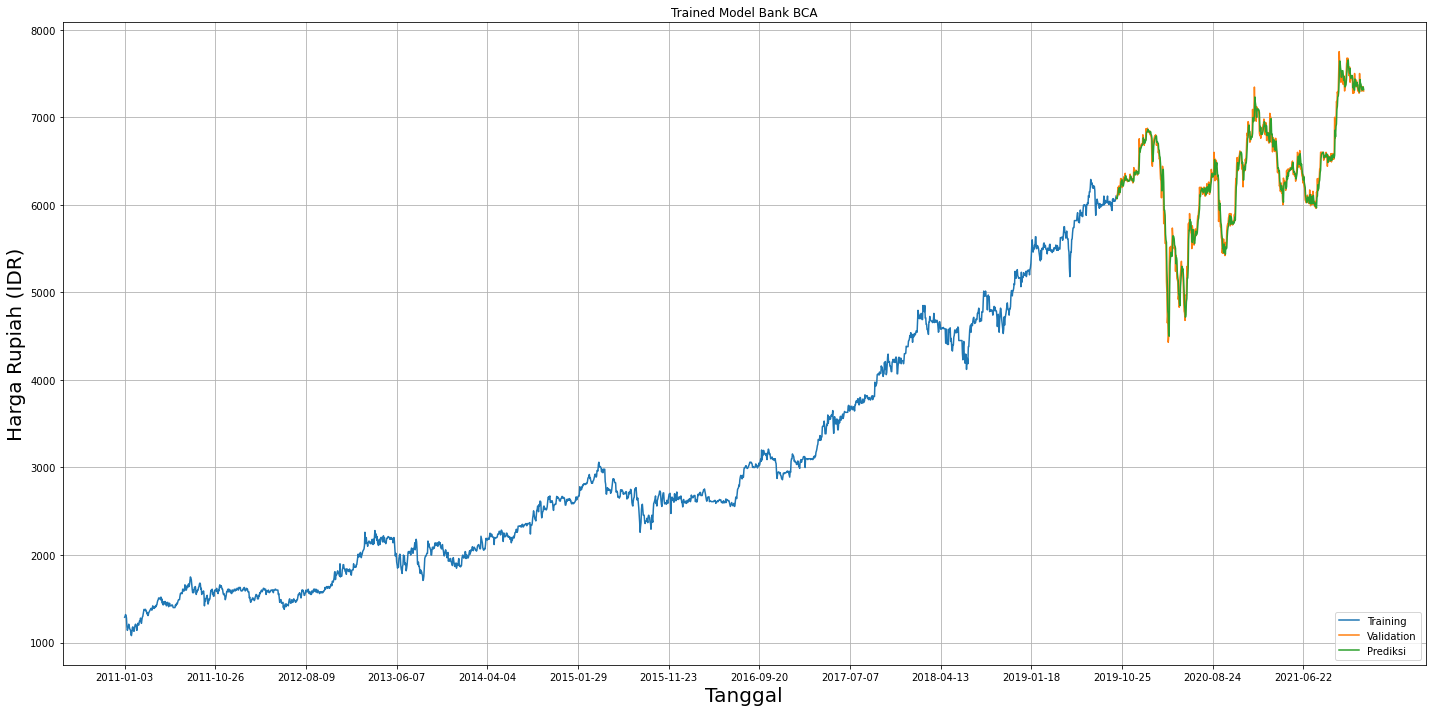

In [31]:
#plot data train dan valdiasi
training = stock_close_data[:trainingDataLength]
validasi_data = stock_close_data[trainingDataLength:]
tanggal = stock_close_data_date[trainingDataLength:]
validasi_data['Prediksi'] = prediksi
validasi_data['Date'] = tanggal

#show plot train, validasi dan prediksi
plt.figure(figsize=(20,10))
plt.title('Trained Model Bank BCA')
plt.xticks(range(0,data.shape[0],200),data['Date'].loc[::200])
plt.xlabel('Tanggal', fontsize=20)
plt.ylabel('Harga Rupiah (IDR)', fontsize=20)
plt.plot(training['Close'])
plt.plot(validasi_data[['Close', 'Prediksi']])
plt.grid(True)
plt.tight_layout()
plt.legend(['Training', 'Validation', 'Prediksi'], loc='lower right')
plt.savefig('outputs/Assets/Grafik Pelatihan Model LSTM.png', dpi=200)
plt.show()

In [32]:
# show 20% data validasi dan prediksi
#validasi_data
hasil = validasi_data[['Date','Close','Prediksi']]
hasil.info()
hasil

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 2188 to 2733
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      546 non-null    object 
 1   Close     546 non-null    float64
 2   Prediksi  546 non-null    float32
dtypes: float32(1), float64(1), object(1)
memory usage: 10.8+ KB


Date   Close     Prediksi
2188  2019-10-09  6070.0  6083.381836
2189  2019-10-10  6110.0  6070.953125
2190  2019-10-11  6125.0  6094.929199
2191  2019-10-14  6200.0  6112.020508
2192  2019-10-15  6175.0  6167.949219
...          ...     ...          ...
2729  2021-12-24  7300.0  7318.045898
2730  2021-12-27  7350.0  7309.855469
2731  2021-12-28  7350.0  7339.448242
2732  2021-12-29  7300.0  7347.041016
2733  2021-12-30  7300.0  7316.560059

[546 rows x 3 columns]

In [33]:
# Evaluasi model
print('RMSE :',(rmse))
print('MAE :',(mae))

RMSE : 117.04601882726065
MAE : 1.2815984415780748


In [34]:
#simpan data prediksi ke exel
hasil.to_excel('outputs/Perbandingan/BBCA_200E_256.xlsx')

# Mencoba melakukan forecasting trend di masa depan

In [35]:
#menghitung jumlah data 
len(scaledData), Xtest.shape

(2734, (546, 60, 1))

In [36]:
#membuat input
InputX = scaledData[2674:].reshape(1,-1)
InputX.shape

(1, 60)

In [37]:
#konversi InputX kedalam list (inputsementar)
ListInputX = list(InputX)
ListInputX = ListInputX[0].tolist()

In [38]:
#Lihat hasil List dari Len(scaledData)
ListInputX

[0.9115442278860568,
 0.9310344827586206,
 0.9257871064467764,
 0.9355322338830583,
 0.9662668665667165,
 1.0,
 0.985007496251874,
 0.9662668665667165,
 0.9625187406296851,
 0.9475262368815591,
 0.9662668665667165,
 0.9662668665667165,
 0.9662668665667165,
 0.955022488755622,
 0.9437781109445276,
 0.9587706146926536,
 0.9475262368815591,
 0.9325337331334331,
 0.9400299850074962,
 0.9437781109445276,
 0.955022488755622,
 0.9737631184407796,
 0.9887556221889056,
 0.985007496251874,
 0.9887556221889056,
 0.9662668665667165,
 0.9625187406296851,
 0.9587706146926536,
 0.9737631184407796,
 0.9475262368815591,
 0.9512743628185907,
 0.9587706146926536,
 0.9587706146926536,
 0.9587706146926536,
 0.9512743628185907,
 0.9287856071964018,
 0.9475262368815591,
 0.9287856071964018,
 0.9325337331334331,
 0.9625187406296851,
 0.9437781109445276,
 0.9400299850074962,
 0.9400299850074962,
 0.9512743628185907,
 0.9400299850074962,
 0.9437781109445276,
 0.9325337331334331,
 0.9325337331334331,
 0.93253373

In [39]:
#konversi InputX kedalam list (inputsementar)
ListInputX = list(InputX)
ListInputX = ListInputX[0].tolist()

ListOutput=[]
n_steps=60
nextNumberOfDays = 28
i=0

while(i<nextNumberOfDays):
    
    if(len(ListInputX)>60):
        InputX=np.array(ListInputX[1:])
        print("{} day input {}".format(i,ListInputX))
        InputX = InputX.reshape(1,-1)
        InputX = InputX.reshape((1, n_steps, 1))
        predvalue = model.predict(InputX, verbose=0)
        print("{} day output {}".format(i,predvalue))
        ListInputX.extend(predvalue[0].tolist())
        ListInputX = ListInputX[1:]
        ListOutput.extend(predvalue.tolist())
        i=i+1
    else:
        InputX = InputX.reshape((1, n_steps,1)) #reshape lagi
        predvalue = model.predict(InputX, verbose=0) #prediksi nilai
        print(predvalue[0])
        ListInputX.extend(predvalue[0].tolist())
        print(len(ListInputX))
        ListOutput.extend(predvalue.tolist())
        i=i+1
    

print(ListOutput)

[0.9337385]
61
1 day input [0.9115442278860568, 0.9310344827586206, 0.9257871064467764, 0.9355322338830583, 0.9662668665667165, 1.0, 0.985007496251874, 0.9662668665667165, 0.9625187406296851, 0.9475262368815591, 0.9662668665667165, 0.9662668665667165, 0.9662668665667165, 0.955022488755622, 0.9437781109445276, 0.9587706146926536, 0.9475262368815591, 0.9325337331334331, 0.9400299850074962, 0.9437781109445276, 0.955022488755622, 0.9737631184407796, 0.9887556221889056, 0.985007496251874, 0.9887556221889056, 0.9662668665667165, 0.9625187406296851, 0.9587706146926536, 0.9737631184407796, 0.9475262368815591, 0.9512743628185907, 0.9587706146926536, 0.9587706146926536, 0.9587706146926536, 0.9512743628185907, 0.9287856071964018, 0.9475262368815591, 0.9287856071964018, 0.9325337331334331, 0.9625187406296851, 0.9437781109445276, 0.9400299850074962, 0.9400299850074962, 0.9512743628185907, 0.9400299850074962, 0.9437781109445276, 0.9325337331334331, 0.9325337331334331, 0.9325337331334331, 0.928785607

9 day output [[0.93517673]]
10 day input [0.9475262368815591, 0.9662668665667165, 0.9662668665667165, 0.9662668665667165, 0.955022488755622, 0.9437781109445276, 0.9587706146926536, 0.9475262368815591, 0.9325337331334331, 0.9400299850074962, 0.9437781109445276, 0.955022488755622, 0.9737631184407796, 0.9887556221889056, 0.985007496251874, 0.9887556221889056, 0.9662668665667165, 0.9625187406296851, 0.9587706146926536, 0.9737631184407796, 0.9475262368815591, 0.9512743628185907, 0.9587706146926536, 0.9587706146926536, 0.9587706146926536, 0.9512743628185907, 0.9287856071964018, 0.9475262368815591, 0.9287856071964018, 0.9325337331334331, 0.9625187406296851, 0.9437781109445276, 0.9400299850074962, 0.9400299850074962, 0.9512743628185907, 0.9400299850074962, 0.9437781109445276, 0.9325337331334331, 0.9325337331334331, 0.9325337331334331, 0.9287856071964018, 0.9625187406296851, 0.9437781109445276, 0.9437781109445276, 0.9362818590704647, 0.9325337331334331, 0.9325337331334331, 0.9400299850074962, 0

18 day output [[0.936708]]
19 day input [0.9400299850074962, 0.9437781109445276, 0.955022488755622, 0.9737631184407796, 0.9887556221889056, 0.985007496251874, 0.9887556221889056, 0.9662668665667165, 0.9625187406296851, 0.9587706146926536, 0.9737631184407796, 0.9475262368815591, 0.9512743628185907, 0.9587706146926536, 0.9587706146926536, 0.9587706146926536, 0.9512743628185907, 0.9287856071964018, 0.9475262368815591, 0.9287856071964018, 0.9325337331334331, 0.9625187406296851, 0.9437781109445276, 0.9400299850074962, 0.9400299850074962, 0.9512743628185907, 0.9400299850074962, 0.9437781109445276, 0.9325337331334331, 0.9325337331334331, 0.9325337331334331, 0.9287856071964018, 0.9625187406296851, 0.9437781109445276, 0.9437781109445276, 0.9362818590704647, 0.9325337331334331, 0.9325337331334331, 0.9400299850074962, 0.9400299850074962, 0.9325337331334331, 0.9325337331334331, 0.9337385296821594, 0.9340450763702393, 0.9342544078826904, 0.9344161748886108, 0.9345495104789734, 0.9346693158149719, 0

25 day output [[0.9380182]]
26 day input [0.9662668665667165, 0.9625187406296851, 0.9587706146926536, 0.9737631184407796, 0.9475262368815591, 0.9512743628185907, 0.9587706146926536, 0.9587706146926536, 0.9587706146926536, 0.9512743628185907, 0.9287856071964018, 0.9475262368815591, 0.9287856071964018, 0.9325337331334331, 0.9625187406296851, 0.9437781109445276, 0.9400299850074962, 0.9400299850074962, 0.9512743628185907, 0.9400299850074962, 0.9437781109445276, 0.9325337331334331, 0.9325337331334331, 0.9325337331334331, 0.9287856071964018, 0.9625187406296851, 0.9437781109445276, 0.9437781109445276, 0.9362818590704647, 0.9325337331334331, 0.9325337331334331, 0.9400299850074962, 0.9400299850074962, 0.9325337331334331, 0.9325337331334331, 0.9337385296821594, 0.9340450763702393, 0.9342544078826904, 0.9344161748886108, 0.9345495104789734, 0.9346693158149719, 0.9347866177558899, 0.9349082112312317, 0.9350379109382629, 0.9351767301559448, 0.9353246092796326, 0.9354808330535889, 0.9356437921524048

In [40]:
day = np.arange(1,61)
day_pred = np.arange(61,89)

In [41]:
day.shape, day_pred.shape

((60,), (28,))

In [42]:
predmasadepan = scaledData.tolist()
predmasadepan.extend(ListOutput)

len(scaledData)

2734

## - <b> Gambaran trend 30 hari kedepan </b>

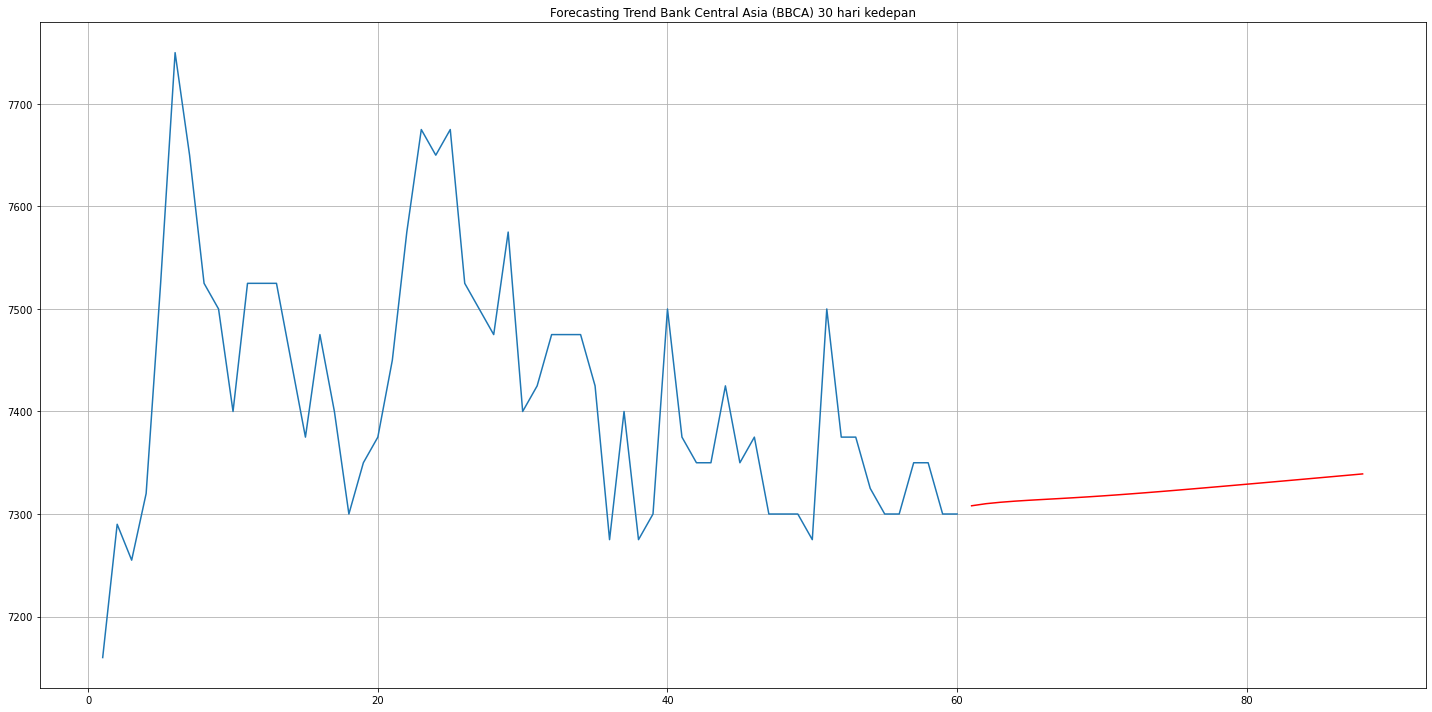

In [43]:
plt.figure(figsize=(20,10))

plt.title('Forecasting Trend Bank Central Asia (BBCA) 30 hari kedepan')
plt.plot(day, scaler.inverse_transform(scaledData[2674:]))
plt.plot(day_pred, scaler.inverse_transform(ListOutput), c='r')
plt.savefig('outputs/Assets/Final/Peramalan Trend Saham BBCA 30 hari kedepan.png', dpi=200)
plt.grid(True)
plt.tight_layout()

plt.show()

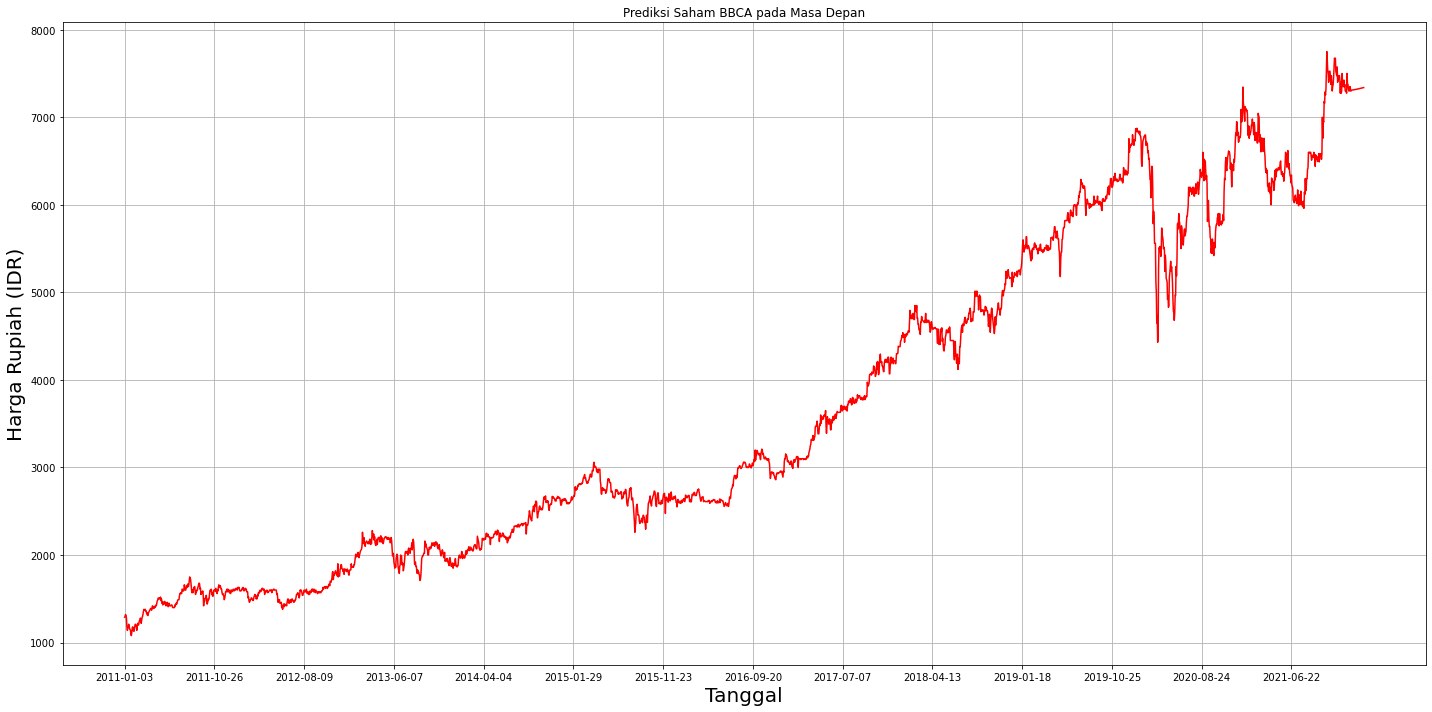

In [44]:
plt.figure(figsize=(20,10))

predmasadepan=scaler.inverse_transform(predmasadepan).tolist()

plt.title("Prediksi Saham BBCA pada Masa Depan")
plt.xticks(range(0,data.shape[0],200),data['Date'].loc[::200])
plt.xlabel('Tanggal', fontsize=20)
plt.ylabel('Harga Rupiah (IDR)', fontsize=20)
plt.plot(predmasadepan, c='r')
plt.grid(True)
plt.tight_layout()
#plt.savefig('outputs/Assets/Peramalan Trend Saham BBCA 100 hari kedepan.png', dpi=200)

plt.show()

## Grafik perbandingan data aktual vs peramalan model

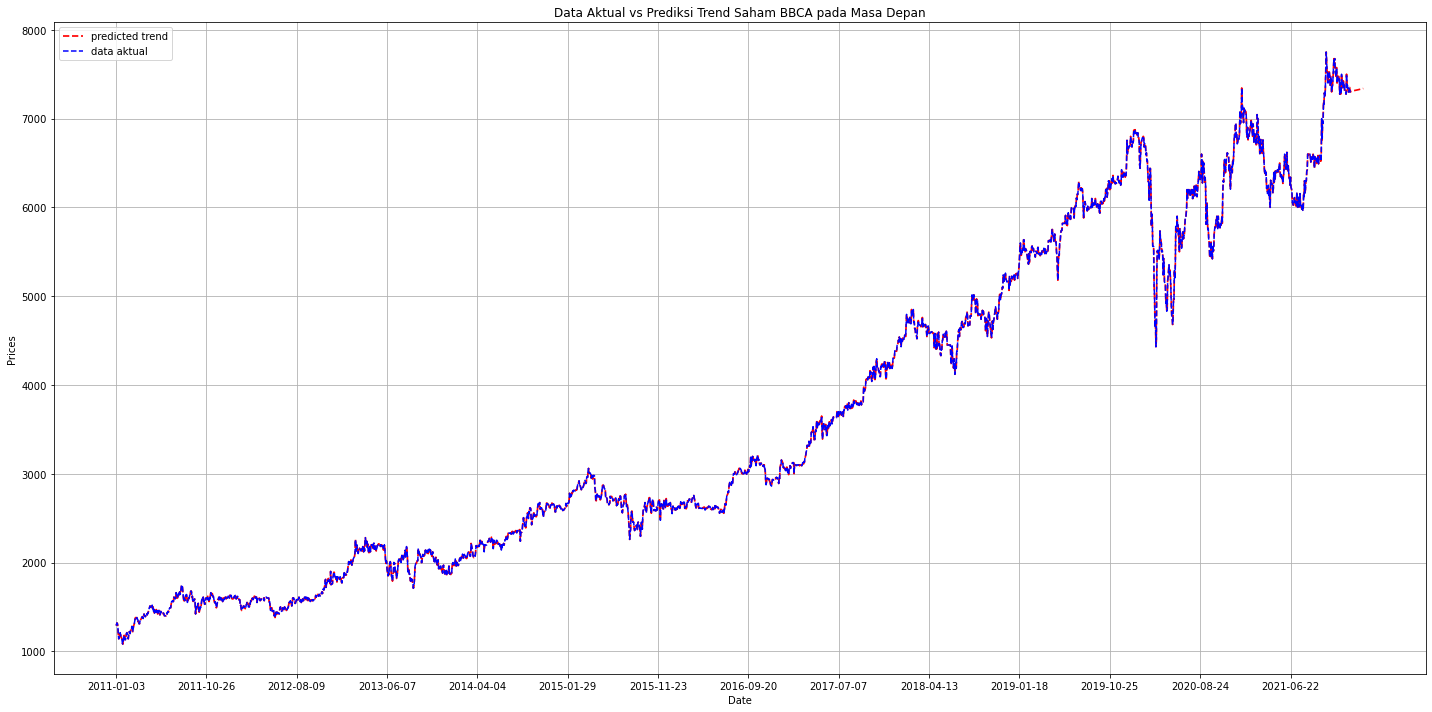

In [45]:
plt.figure(figsize=(20,10))


plt.title("Data Aktual vs Prediksi Trend Saham BBCA pada Masa Depan")
plt.xticks(range(0,data.shape[0],200),data['Date'].loc[::200])
plt.xlabel('Date')
plt.ylabel('Prices')
#plt.plot(scaling_data('Close'),  c ='b')
plt.plot(predmasadepan, c='r', linestyle='--', linewidth=1.7, label='predicted trend')
plt.plot(data['Close'], c='b', linestyle='--', linewidth=1.5, label='data aktual')
plt.grid(True)
plt.tight_layout()
plt.legend(loc='upper left')
plt.savefig('outputs/Assets/Data Aktual v Trend Prediction.png', dpi=200)

plt.show()